In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Defining a simple neural network
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        # Input layer
        self.input = nn.Linear(input_size, hidden_size)
        # Hidden layer
        self.hidden = nn.Linear(hidden_size, hidden_size)
        # Output layer
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through the input layer
        x = self.input(x)
        # Apply ReLU activation function
        x = torch.relu(x)
        # Forward pass through the hidden layer
        x = self.hidden(x)
        # Apply ReLU activation function
        x = torch.relu(x)
        # Forward pass through the output layer
        x = self.output(x)
        return x

In [3]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [4]:
# Generate random input data
input_size = 10
hidden_size = 5
output_size = 2
batch_size = 100
input_data = torch.randn(batch_size, input_size)

In [5]:
# Generate random target data
target_data = torch.randn(batch_size, output_size)

In [6]:
# Create an instance of the neural network
model = SimpleNet(input_size, hidden_size, output_size)

In [7]:
# Define loss function
criterion = nn.MSELoss()

In [8]:
# Define optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# Training loop
num_epochs = 100000
loss_values = []

for epoch in range(num_epochs):
    # Forward pass
    output = model(input_data)
    
    # Calculate loss
    loss = criterion(output, target_data)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Store loss value
    loss_values.append(loss.item())
    
    # Print loss for every 10000 epochs
    if (epoch + 1) % 10000 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10000/100000], Loss: 0.6388
Epoch [20000/100000], Loss: 0.5598
Epoch [30000/100000], Loss: 0.5343
Epoch [40000/100000], Loss: 0.5272
Epoch [50000/100000], Loss: 0.5104
Epoch [60000/100000], Loss: 0.5065
Epoch [70000/100000], Loss: 0.5029
Epoch [80000/100000], Loss: 0.4955
Epoch [90000/100000], Loss: 0.4927
Epoch [100000/100000], Loss: 0.4979


In [10]:
# Evaluation
with torch.no_grad():
    output = model(input_data)
    predicted = output.numpy()
    target = target_data.numpy()
    
    print("Predicted:")
    print(predicted[:5])  # Print the first 5 predicted samples
    print("Target:")
    print(target[:5])  # Print the first 5 target samples

Predicted:
[[-1.2888443  -0.85159236]
 [-0.06161863 -0.36897343]
 [-0.7043744   0.07772279]
 [ 0.27064234  0.63217974]
 [-1.2744744   0.560354  ]]
Target:
[[ 1.01067446e-01 -1.30949163e+00]
 [-4.10357714e-01  4.68094230e-01]
 [-2.34627649e-01  2.78244108e-01]
 [-1.29547261e-04 -1.24497563e-01]
 [-5.58524907e-01  6.63694561e-01]]


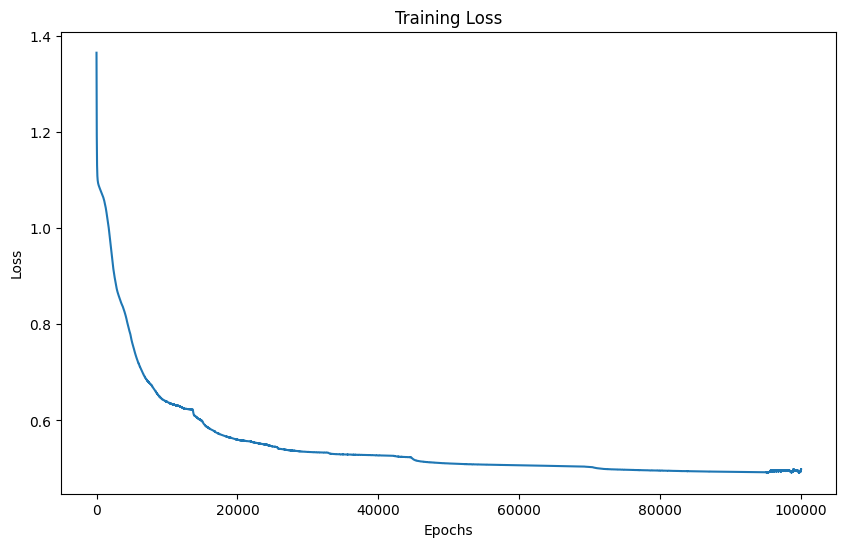

In [11]:
# Visualize loss curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(loss_values)), y=loss_values)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()